# What to expect

In notebook 3A we ran a differential gene expression analysis on the example dataset <i>Schistosoma mansoni</i> and visualised the results in a volcano plot. 

In this notebook we will apply the same methods to our dataset of choice.

# Set up
First, we need to import the required libraries and install PyDESeq2 again

In [1]:
# import required libraries
import pandas as pd

#Install PyDESeq2 and import required classes
! pip install --quiet pydeseq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

We now need to create the dds object again, as we will use it for the next steps of the analysis.

<div class="alert alert-block alert-warning">
    
Create the counts and the metadata tables and restrict them so that they only contain the conditions we want to compare.

In [2]:
# load the counts and metadata again - remember that we have to transpose the ReadsPerGene table to use it in PyDESeq2. We will also replace empty values with 0
counts = pd.read_csv("analysis/Plasmodium/star/ReadsPerGene.csv", index_col=0).T
counts.fillna(0)
metadata = pd.read_csv("data/Plasmodium/metadata.csv", index_col=0)


# restrict to the 2 stages we want to compare. We have added a line of code to remove any genes that are not expressed in any of our conditions.
counts_s = counts[metadata["condition"].isin(["wildtype"])]
counts_s = counts_s.loc[:, (counts_s != 0).any(axis=0)]
metadata_s = metadata[metadata["condition"].isin(["wildtype"])]

Now that we have the counts and metadata, we can create the DESeq2 dataset again

In [3]:
# create DESeq2 dataset object
dds = DeseqDataSet(
    counts=counts_s,
    metadata=metadata_s,
    design="category",
    refit_cooks=True
)

# Differential Expression analysis

We will now apply the `deseq2` method to our dds object. Remember that this method normalises the data, estimates the dispersion and calculates the log fold change (LFC) based on the design factor.

In [4]:
# Run DESeq2
dds.deseq2()

Using None as control genes, passed at DeseqDataSet initialization


Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 6.77 seconds.

Fitting dispersion trend curve...
... done in 0.19 seconds.

Fitting MAP dispersions...
... done in 7.60 seconds.

Fitting LFCs...
... done in 3.69 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.



To find out which differences in gene expression are statistically significant, use the class `DeseqStats` on our dds object, and store the output in a new object called "stat_res"

In [8]:
stat_res=DeseqStats(dds, contrast=["category","wildtype 22-24 hrs post invasion", "wildtype 16hrs post invasion"])

Now, we have to generate a summary of the statistical analysis contained in the "stat_res" object. To do that, we use the `summary` method.

In [9]:
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: category wildtype 22-24 hrs post invasion vs wildtype 16hrs post invasion
                    baseMean  log2FoldChange     lfcSE      stat    pvalue  \
gene                                                                         
PBANKA_0000101      0.499719        0.458866  4.079205  0.112489  0.910436   
PBANKA_0000301     10.017695       -0.514198  1.046232 -0.491476  0.623090   
PBANKA_0000401     21.489374        2.099221  0.840431  2.497792  0.012497   
PBANKA_0000600     24.726040       -1.279853  0.682757 -1.874536  0.060857   
PBANKA_0000701      4.955227       -0.378884  1.502378 -0.252189  0.800895   
...                      ...             ...       ...       ...       ...   
PBANKA_MIT03100     0.599233       -0.100783  4.122904 -0.024445  0.980498   
PBANKA_MIT03200     1.342497       -0.161324  3.599539 -0.044818  0.964252   
PBANKA_MIT03500  4967.510592        1.068291  0.586247  1.822255  0.068416   
PBANKA_MIT03600    80.486185  

... done in 1.42 seconds.



Store the results in a dataframe called "res", so you can work with the results.

To do this, apply the PyDESeq2 attribute `results_df` to your stat_res object

In [10]:
res = stat_res.results_df
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene,,,,,,
PBANKA_0000101,0.499719,0.458866,4.079205,0.112489,0.910436,0.922083
PBANKA_0000301,10.017695,-0.514198,1.046232,-0.491476,0.623090,0.655710
PBANKA_0000401,21.489374,2.099221,0.840431,2.497792,0.012497,0.016511
PBANKA_0000600,24.726040,-1.279853,0.682757,-1.874536,0.060857,0.074635
PBANKA_0000701,4.955227,-0.378884,1.502378,-0.252189,0.800895,0.823293
...,...,...,...,...,...,...
PBANKA_MIT03100,0.599233,-0.100783,4.122904,-0.024445,0.980498,0.984900
PBANKA_MIT03200,1.342497,-0.161324,3.599539,-0.044818,0.964252,0.970096
PBANKA_MIT03500,4967.510592,1.068291,0.586247,1.822255,0.068416,0.083350


To make sure you understand the differential expression analysis, do the exercise below - the answers will be helpful to complete the bioinformatics analysis summary

<div class="alert alert-block alert-warning">
    
- Pick the first gene in the res dataframe that has a Log2FoldChange higher than 1 or smaller than -1
- Find the reads for that gene in each of your samples. You can find them by exploring the "ReadPerGene.csv" file that you saved in workshop 2B
- Explain how the expression of that gene changes between samples and how that relates to the Log2FoldChange value shown in your differential expression results

In [11]:
#Load the ReadPerGene.csv into a dataframe
Readspergene=pd.read_csv("analysis/Plasmodium/star/ReadsPerGene.csv", index_col=0)
#Find the row for gene Tb05.30F7.410 and print it
Gene= Readspergene.loc["PBANKA_0000401"]
Gene

260Sch-1_S13           12
260Sch-2_S14            7
260Sch-3_S15           12
820LT-1_S1             11
820LT-2_S2              1
820LT-3_S3              9
820Sch-1_S10           48
820Sch-2_S11           58
820Sch-3_S12           41
G260-1_S4              11
G260-2_S5              14
G260-3_S6               9
G260sch-1-23468787    103
G260sch-2-23468788     43
G260sch-3-23468793     52
Name: PBANKA_0000401, dtype: int64

You can use this text cell to make notes, or add the answers straight into your analysis summary

I have picked the gene PBANKA_0000401, with Log2FoldChange=2.1

The counts of this gene are:
    
    16hr (late trophozoite): 11, 1 and 9
    24hr (schizont): 48, 58, 41
    
Therefore, the Log2FoldChange of 2.1 in differential expression analysis means... 

# Cleaning and exploring the results

As we saw in notebook 3A, there might be p-values of 0.0 in your analysis result. You have to replace those 0.0 values with a very small number, so they do not cause errors later on.

In [12]:
import numpy as np

# replace p-values of 0 with a very small number
res.loc[ res.pvalue == 0, "pvalue" ] = np.finfo(np.float64).tiny
res.loc[ res.padj == 0, "padj" ] = np.finfo(np.float64).tiny

In [13]:
# make a new folder to save the differential expression analysis results
! mkdir -p "analysis/Plasmodium/de"
# save the results with a sensible name
res.to_csv("analysis/Plasmodium/de/24_vs_16.full.csv")

Now remove genes with very low expression using the threshold baseMean of 10

In [14]:
# remove results with baseMean<10
res=res[res.baseMean>=10]
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene,,,,,,
PBANKA_0000301,10.017695,-0.514198,1.046232,-0.491476,0.623090,0.655710
PBANKA_0000401,21.489374,2.099221,0.840431,2.497792,0.012497,0.016511
PBANKA_0000600,24.726040,-1.279853,0.682757,-1.874536,0.060857,0.074635
PBANKA_0000901,20.009201,0.783184,0.733415,1.067859,0.285584,0.317755
PBANKA_0001001,169.147522,-0.278415,0.297190,-0.936824,0.348849,0.383179
...,...,...,...,...,...,...
PBANKA_MIT02700,1717.186751,0.662946,0.304095,2.180063,0.029253,0.037178
PBANKA_MIT02800,129.439561,0.717235,0.523640,1.369711,0.170777,0.197053
PBANKA_MIT03500,4967.510592,1.068291,0.586247,1.822255,0.068416,0.083350


<div class="alert alert-block alert-warning">

Find out the following - the answers will be helpful to complete the bioinformatics analysis summary:

- How many genes are significantly differentially expressed?
- For how many of these significant genes is the fold change (FC) greater than 2 or less than 0.5?

In [15]:
#Find out how many genes are significantly differentially expressed
sum(res.padj<=0.05)

4100

In [16]:
# Get a list of only those genes that have a FC > 2 or < 0.5 and are significantly changed
sigs=res[(res.padj<=0.05)&(abs(res.log2FoldChange)>1)]
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene,,,,,,
PBANKA_0000401,21.489374,2.099221,0.840431,2.497792,1.249694e-02,1.651072e-02
PBANKA_0007701,61.267753,2.148681,0.514702,4.174614,2.984915e-05,4.844016e-05
PBANKA_0008101,195.532688,1.897002,0.295482,6.420024,1.362527e-10,2.953481e-10
PBANKA_0100021,1402.834566,3.470356,0.160627,21.605067,1.609565e-103,3.570181e-102
PBANKA_0100041,38.141408,1.635651,0.726650,2.250948,2.438885e-02,3.127461e-02
...,...,...,...,...,...,...
PBANKA_1466121,226.572142,-1.131772,0.267507,-4.230814,2.328471e-05,3.811168e-05
PBANKA_API00095,71.627149,2.234160,0.736169,3.034845,2.406591e-03,3.382129e-03
PBANKA_MIT00800,106.386590,1.004900,0.469699,2.139455,3.239881e-02,4.098433e-02


Let's save the significantly up- and downregulated genes with an absolute fold change > 1.5 in two separate csv files in the 'de' folder so you can use them later. 1.5 is just a suggested threshold. You can play with the threshold and see what comes out. 

In [17]:
# Save the upregulated genes
up = res[(res.padj<=0.05)&((res.log2FoldChange)>np.log2(1.5))]
up.to_csv("analysis/Plasmodium/de/24_vs_16.up.csv")
up

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene,,,,,,
PBANKA_0000401,21.489374,2.099221,0.840431,2.497792,1.249694e-02,1.651072e-02
PBANKA_0007701,61.267753,2.148681,0.514702,4.174614,2.984915e-05,4.844016e-05
PBANKA_0008101,195.532688,1.897002,0.295482,6.420024,1.362527e-10,2.953481e-10
PBANKA_0100021,1402.834566,3.470356,0.160627,21.605067,1.609565e-103,3.570181e-102
PBANKA_0100041,38.141408,1.635651,0.726650,2.250948,2.438885e-02,3.127461e-02
...,...,...,...,...,...,...
PBANKA_API00095,71.627149,2.234160,0.736169,3.034845,2.406591e-03,3.382129e-03
PBANKA_MIT00800,106.386590,1.004900,0.469699,2.139455,3.239881e-02,4.098433e-02
PBANKA_MIT01000,206.692383,1.021473,0.411513,2.482239,1.305596e-02,1.722717e-02


In [19]:
# Save the downregulated genes
down = res[(res.padj<=0.05)&((res.log2FoldChange)<(-(np.log2(1.5))))]
down.to_csv("analysis/Plasmodium/de/24_vs_16.down.csv")
down

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene,,,,,,
PBANKA_0100100,201.871191,-2.298188,0.290988,-7.897880,2.836870e-15,7.687486e-15
PBANKA_0100200,1626.922711,-1.330330,0.121872,-10.915836,9.683467e-28,4.152594e-27
PBANKA_0101000,4546.956831,-1.853168,0.126449,-14.655426,1.243736e-48,9.700951e-48
PBANKA_0101200,4543.370028,-0.978188,0.130092,-7.519196,5.511413e-14,1.391645e-13
PBANKA_0101300,2578.706476,-1.617342,0.144101,-11.223698,3.119480e-29,1.393476e-28
...,...,...,...,...,...,...
PBANKA_1465400,152.986935,-0.975563,0.353301,-2.761282,5.757499e-03,7.825698e-03
PBANKA_1465500,138.688469,-1.079227,0.332744,-3.243418,1.181049e-03,1.710772e-03
PBANKA_1466000,242.161538,-0.917650,0.285333,-3.216065,1.299615e-03,1.874112e-03


# Visualisation

Visualise your results in a volcano plot

In [20]:
import matplotlib.pylab as plt

<div class="alert alert-block alert-warning">

Using matplotlib (plt), make a scatter plot that: 
* in the X axis plots the log2FoldChange values from the "res" dataframe 
* in the Y axis plots the -log10 of the padj values from the "res" dataframe

In [21]:
# First, create a new column in the dataframe res that contains the -log10(padj)
res['-log10 padj']=-np.log10(res['padj'])
res

/tmp/ipykernel_1770/3526454042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['-log10 padj']=-np.log10(res['padj'])


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,-log10 padj
gene,,,,,,,
PBANKA_0000301,10.017695,-0.514198,1.046232,-0.491476,0.623090,0.655710,0.183288
PBANKA_0000401,21.489374,2.099221,0.840431,2.497792,0.012497,0.016511,1.782234
PBANKA_0000600,24.726040,-1.279853,0.682757,-1.874536,0.060857,0.074635,1.127058
PBANKA_0000901,20.009201,0.783184,0.733415,1.067859,0.285584,0.317755,0.497908
PBANKA_0001001,169.147522,-0.278415,0.297190,-0.936824,0.348849,0.383179,0.416598
...,...,...,...,...,...,...,...
PBANKA_MIT02700,1717.186751,0.662946,0.304095,2.180063,0.029253,0.037178,1.429711
PBANKA_MIT02800,129.439561,0.717235,0.523640,1.369711,0.170777,0.197053,0.705418
PBANKA_MIT03500,4967.510592,1.068291,0.586247,1.822255,0.068416,0.083350,1.079094


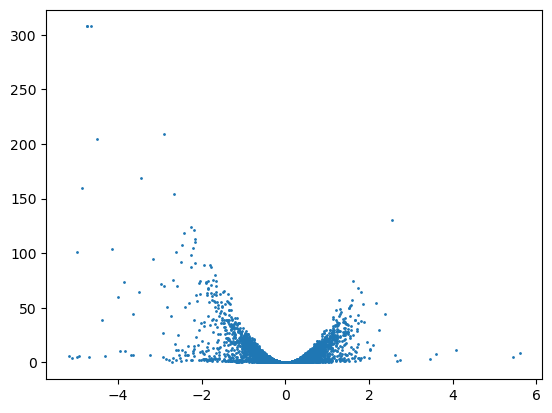

In [86]:
# Now, make the scatter plot 
plt.scatter(x=res['log2FoldChange'],y=res['-log10 padj'], s=1)

<div class="alert alert-block alert-warning">

Make the volcano plot fancier by 

1- colouring dots depending on:
* whether the corresponding genes is up- or downregulated -> We will consider that a gene is up- or downregulated if it's expression at least doubles or halves between the two conditions
* whether the change in expression of the corresponding gene is significant -> We will use padj<0.05

2- adding:

* axes labels
* lines at the threshold values
* legend

3- save it as a png image so you can use it later

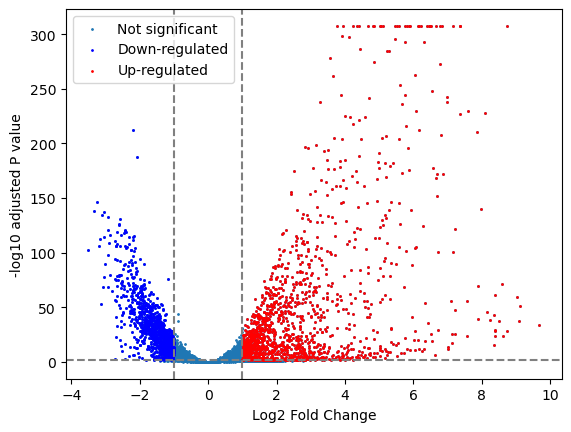

In [23]:
# define which parameters determine if a gene is significantly up or down
down = res[(res['log2FoldChange']<=-1)&(res['padj']<0.05)]
up = res[(res['log2FoldChange']>=1)&(res['padj']<0.05)]

# plot all the genes and label as non-significant
plt.scatter(x=res['log2FoldChange'],y=res['-log10 padj'],s=1,label="Not significant")
# colour downregulated genes in blue
plt.scatter(x=down['log2FoldChange'],y=down['-log10 padj'],s=1,label="Down-regulated",color="blue")
# colour upregulated genes in red
plt.scatter(x=up['log2FoldChange'],y=up['-log10 padj'],s=1,label="Up-regulated",color="red")

# add axes labels
plt.xlabel("Log2 Fold Change")
plt.ylabel("-log10 adjusted P value")

# add threshold lines
plt.axvline(-1,color="grey",linestyle="--")
plt.axvline(1,color="grey",linestyle="--")
plt.axhline(2,color="grey",linestyle="--")

# add a legend
plt.legend()

# save as png
plt.savefig('Plasmodium_volcano.png')